## Hehe Playground

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np;

In [62]:
from sklearn.datasets.samples_generator import make_blobs

In [63]:
X, ys_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

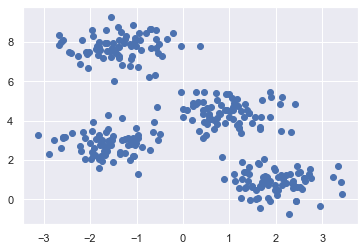

In [64]:
plt.scatter(X[:, 0], X[:, 1]);

In [65]:
from sklearn.cluster import KMeans

In [66]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

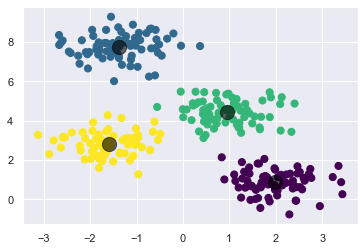

In [67]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis');
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.6);

In [68]:
from sklearn.metrics import pairwise_distances_argmin

In [69]:
def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(0)
                        for i in range(n_clusters)])
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

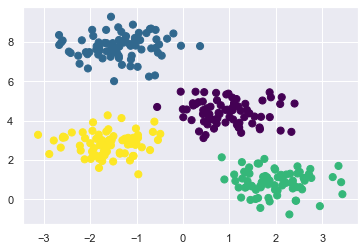

In [70]:
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s = 50, cmap='viridis')

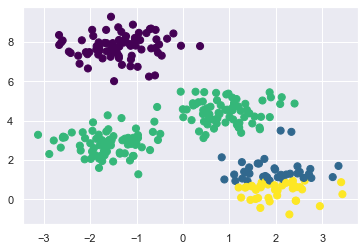

In [71]:
"""The globally optimal result may not be achieved"""
centers, labels = find_clusters(X, 4, rseed=0);
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap = 'viridis')

In [72]:
"""The number of clusters must be selected beforehandA"""
labels = KMeans(6, random_state=0).fit_predict(X)

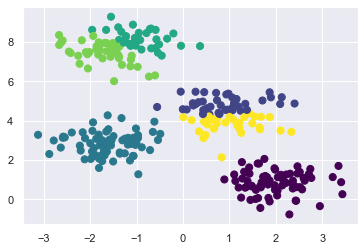

In [73]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

In [74]:
"""means is limited to linear cluster boundaries"""

from sklearn.datasets import make_moons

In [75]:
X, y = make_moons(200, noise=.05, random_state=0);

In [76]:
labels = KMeans(2, random_state=0).fit_predict(X)

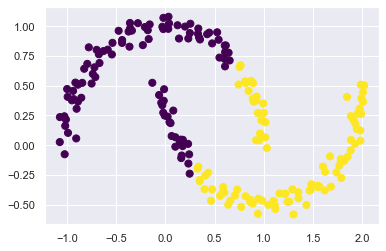

In [77]:
plt.scatter(X[:, 0], X[:, 1], c = labels, s=50, cmap='viridis')

In [78]:
"""Using SpectralClustering """
"""It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm:"""
from sklearn.cluster import SpectralClustering

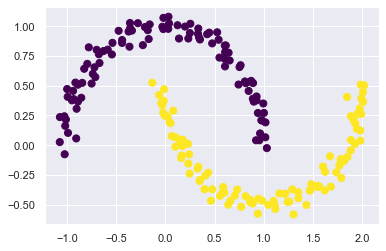

In [79]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap='viridis')